In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# df = pd.read_csv ("../data/mobile.csv")
# df

df = pd.read_csv("../data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: xlabel='Outcome', ylabel='count'>

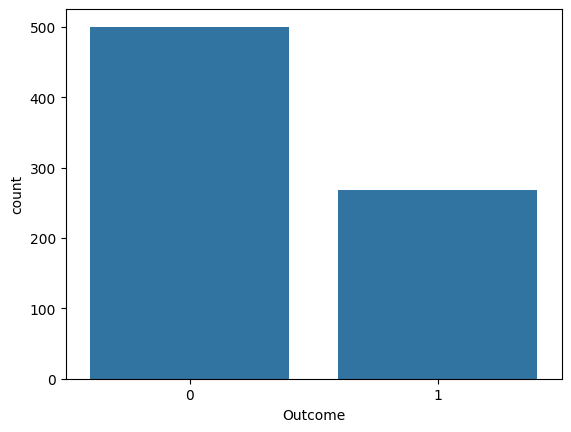

In [4]:
df['Outcome'].value_counts()
sns.countplot(data=df, x='Outcome')

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X.shape, y.shape

((768, 8), (768,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y)

display(X_train.head(5))
display(y_train.head(5))
display(X_test.head(5))
display(y_test.head(5))

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (y_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
699,4,118,70,0,0,44.5,0.904,26
251,2,129,84,0,0,28.0,0.284,27
426,0,94,0,0,0,0.0,0.256,25
112,1,89,76,34,37,31.2,0.192,23
247,0,165,90,33,680,52.3,0.427,23


699    0
251    0
426    0
112    0
247    0
Name: Outcome, dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,5,158,84,41,210,39.4,0.395,29
594,6,123,72,45,230,33.6,0.733,34
746,1,147,94,41,0,49.3,0.358,27
538,0,127,80,37,210,36.3,0.804,23
467,0,97,64,36,100,36.8,0.600,25


195    1
594    0
746    1
538    0
467    0
Name: Outcome, dtype: int64

(614, 8) (154, 8) (614,) (154,)
699    0
251    0
426    0
112    0
247    0
      ..
763    0
677    0
314    1
380    0
514    0
Name: Outcome, Length: 614, dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       109
           1       0.61      0.73      0.67        45

    accuracy                           0.79       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.80      0.79      0.79       154



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        98
           1       0.59      0.57      0.58        56

    accuracy                           0.70       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       105
           1       0.63      0.69      0.66        49

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.78      0.77      0.78       154



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict (X_test)

print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       111
           1       0.57      0.72      0.64        43

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.78       154



([<matplotlib.axis.XTick at 0x128270090>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46, 0, '46'),
  Text(47,

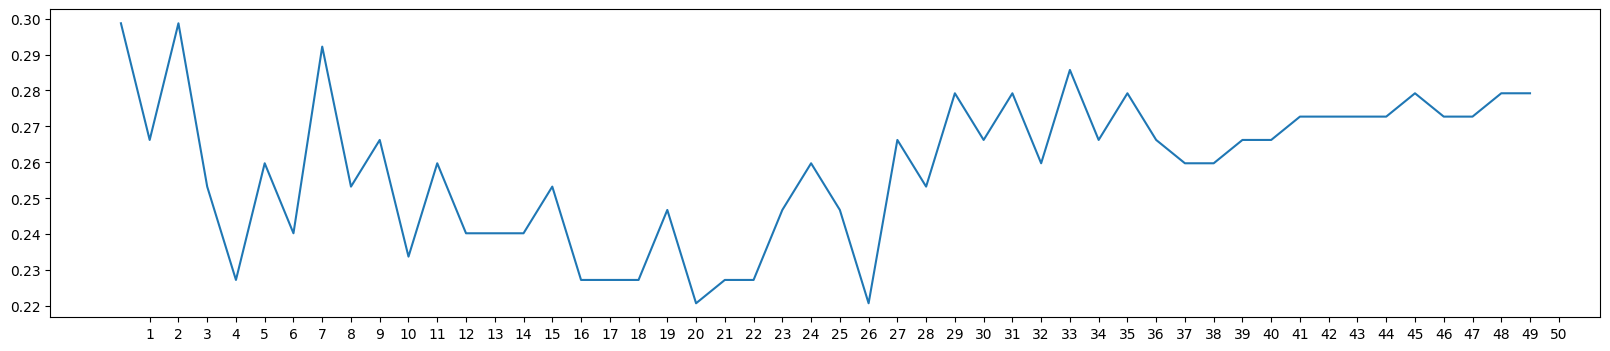

In [11]:
from sklearn.metrics import accuracy_score

scores = []

for K in range (50) : 
    model = KNeighborsClassifier(n_neighbors=K+1)
    model.fit (X_train, y_train)
    y_pred = model.predict (X_test)
    scores.append (1-accuracy_score(y_test, y_pred))
    
plt.figure(figsize=(20, 4))
plt.plot (scores)
plt.xticks([i for i in range (1, 51)])


In [12]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit (X_train, y_train)
y_pred = model.predict (X_test)
print (accuracy_score(y_test, y_pred))

0.7792207792207793


In [19]:
print (y_pred)
print (y_test)
y_test = list(y_test)
for i in range (len(y_pred)) : 
    print (i+1)
    print (f"y_pred, y_test = {y_pred[i], y_test[i]}")
    print (f"is same? : {y_pred[i] == y_test[i]}")
    print ()

[1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
1
y_pred, y_test = (1, 1)
is same? : True

2
y_pred, y_test = (0, 0)
is same? : True

3
y_pred, y_test = (1, 1)
is same? : True

4
y_pred, y_test = (0, 0)
is same? : True

5
y_pred, y_test = (0, 0)
is same? : True

6
y_pred